In [7]:
import pandas as pd
import faker

# Create a Faker instance
fake = faker.Faker()

# Function to generate random data
def generate_faker_data(num_records=1000):
    data = []
    for _ in range(num_records):
        name = fake.name()
        gender = fake.random_element(elements=('Male', 'Female'))
        address = fake.address()
        year = fake.random_int(min=1950, max=2000)
        email = fake.email()
        phone_number = fake.phone_number()
        job = fake.job()
        company = fake.company()
        country = fake.country()
        city = fake.city()
        date_time = fake.date_time_this_decade()
        credit_card_number = fake.credit_card_number()

        data.append((name, gender, address, year, email, phone_number, job, company, country, city, date_time, credit_card_number))

    return data

# Generate data and create DataFrame
data = generate_faker_data()
columns = ['name', 'gender', 'address', 'year', 'email', 'phone_number', 'job', 'company', 'country', 'city', 'date_time', 'credit_card_number']
df_faker = pd.DataFrame(data, columns=columns)



In [8]:
# Function to generate random data for Wikipedia-like table
def generate_wikipedia_data(num_records=1000):
    data = []
    for i in range(num_records):
        revision_old = fake.random_int(min=1000, max=5000)
        revision_new = revision_old + fake.random_int(min=1, max=100)
        timestamp = fake.date_time_this_decade()
        user = fake.user_name()
        bot = fake.random_element(elements=(True, False))
        length_old = fake.random_int(min=50, max=500)
        length_new = length_old + fake.random_int(min=1, max=50)

        data.append((i + 1, fake.random_element(elements=('A', 'B', 'C')), fake.text(max_nb_chars=50),
                     timestamp, user, bot, length_old, length_new, revision_old, revision_new))

    return data

# Generate data and create DataFrame
data = generate_wikipedia_data()
columns = ['id', 'type', 'title', 'timestamp', 'user', 'bot', 'length_old', 'length_new', 'revision_old', 'revision_new']
df_wikipedia = pd.DataFrame(data, columns=columns)

In [37]:
import random
from datetime import datetime, timedelta
# Function to generate random weather data
def generate_weather_data(num_records=1000):
    data = []
    for _ in range(num_records):
        forecast_date = fake.date_between(start_date='today', end_date='+10d')
        location = fake.city()
        description = fake.address()
        temp = round(random.uniform(-10, 40), 2)
        feels_like = round(random.uniform(temp - 5, temp + 5), 2)
        temp_min = round(random.uniform(temp - 3, temp), 2)
        temp_max = round(random.uniform(temp, temp + 3), 2)
        pressure = random.randint(980, 1030)
        humidity = random.randint(30, 90)
        wind = round(random.uniform(0, 15), 2)
        sunrise = fake.date_time_this_decade().time().strftime('%H:%M:%S')
        sunset = (datetime.strptime(sunrise, '%H:%M:%S') + timedelta(hours=12)).strftime('%H:%M:%S')

        data.append((forecast_date, location, description, temp, feels_like, temp_min, temp_max, pressure, humidity, wind, sunrise, sunset))

    return data

# Generate data and create DataFrame
data = generate_weather_data()
columns = ['forecastdate', 'location', 'description', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind', 'sunrise', 'sunset']
df_weather = pd.DataFrame(data, columns=columns)

In [9]:
df_wikipedia.head()

,id,type,title,timestamp,user,bot,length_old,length_new,revision_old,revision_new
0,1,B,Change commercial town support drug risk point.,2020-09-04 11:33:50.402494,kwilliams,True,295,306,4145,4226
1,2,A,Affect at security series rate.,2023-10-05 01:47:15.695733,dsmith,False,167,198,4425,4465
2,3,A,Fall show again admit with.,2022-04-04 03:04:58.873155,williamsmichael,False,95,114,4168,4233
3,4,C,Upon total expert public.,2022-08-25 02:36:07.776900,christopherstone,False,161,162,2806,2883
4,5,A,Far care task water section a scientist.,2023-06-27 19:46:48.839987,brownmelissa,True,207,231,2509,2607


/tmp/ipykernel_11068/277870746.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_wikipedia, x='timestamp', y='revision_new', estimator='count', ci=None)


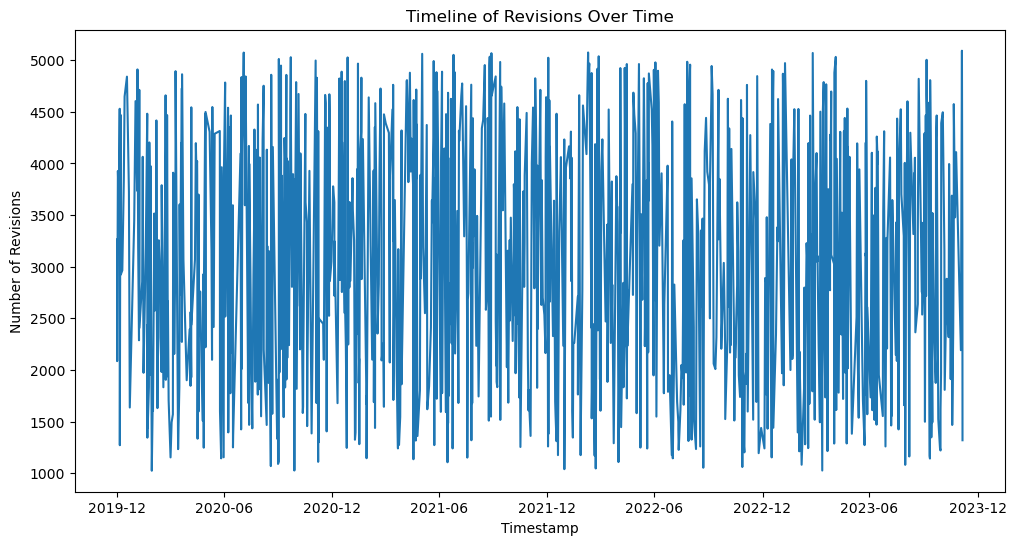

In [13]:
# Convert 'timestamp' to datetime format
df_wikipedia['timestamp'] = pd.to_datetime(df_wikipedia['timestamp'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot timeline of revisions over time
sns.lineplot(data=df_wikipedia, x='timestamp', y='revision_new', estimator='count', ci=None)

# Customize the plot
plt.title('Timeline of Revisions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Revisions')
plt.show()


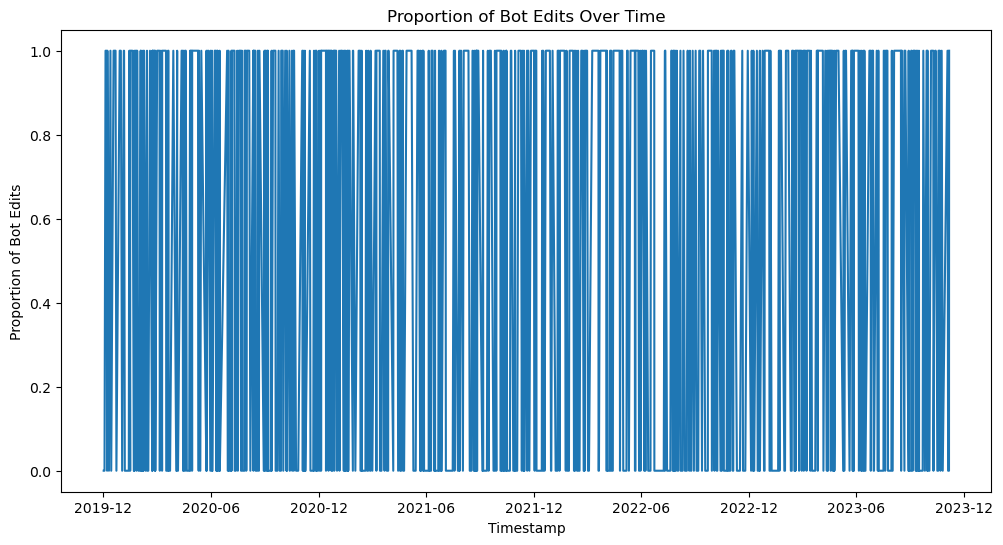

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot distribution of edit lengths for bot and non-bot edits
sns.histplot(df_wikipedia, x='length_new', hue='bot', bins=5, kde=True, palette='Set1')

# Customize the plot
plt.title('Distribution of Edit Lengths for Bot and Non-Bot Edits')
plt.xlabel('Edit Length')
plt.ylabel('Frequency')
plt.legend(title='Bot Edit')
plt.show()


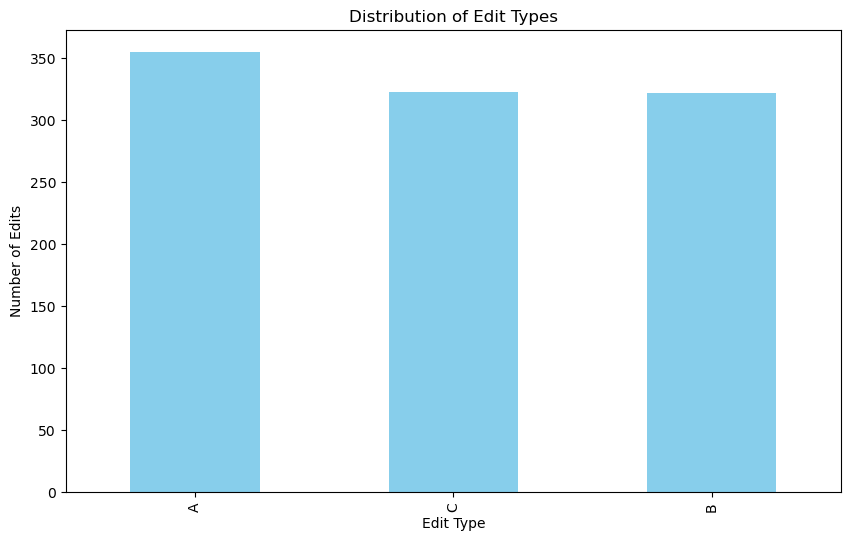

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Count the number of edits for each type
edit_type_counts = df_wikipedia['type'].value_counts()

# Plot a bar chart of edit types
edit_type_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Edit Types')
plt.xlabel('Edit Type')
plt.ylabel('Number of Edits')
plt.show()


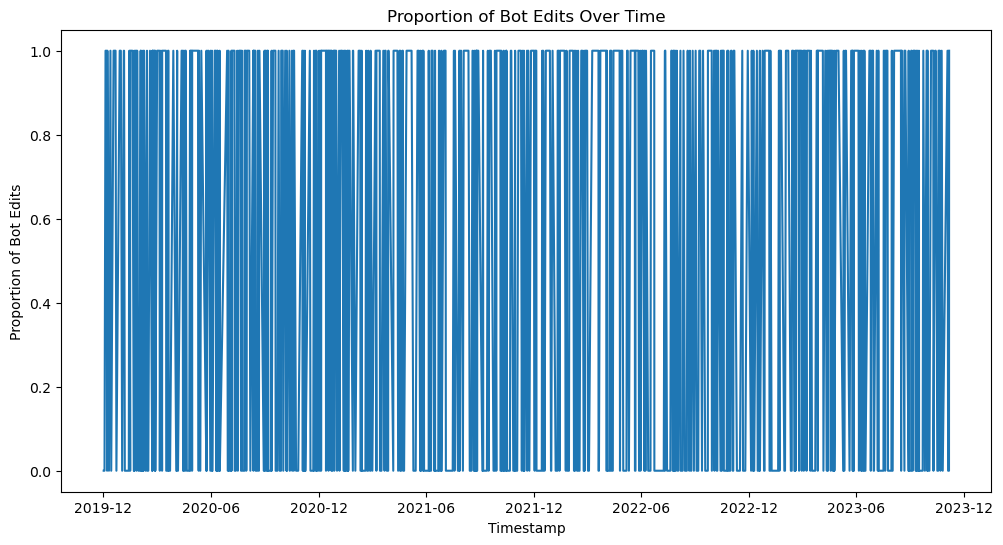

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Calculate the proportion of bot edits over time
df_wikipedia['bot_proportion'] = df_wikipedia.groupby('timestamp')['bot'].transform('mean')

# Plot the proportion of bot edits over time
sns.lineplot(data=df_wikipedia, x='timestamp', y='bot_proportion')

# Customize the plot
plt.title('Proportion of Bot Edits Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Proportion of Bot Edits')
plt.show()


In [17]:
df_faker.head()

,name,gender,address,year,email,phone_number,job,company,country,city,date_time,credit_card_number
0,Robert Strong,Male,659 Mccormick Road Apt. 017\nNorth Kimberlypor...,1970,pooledenise@example.com,360-885-8197,"Engineer, civil (contracting)",Skinner Ltd,Philippines,Ericaburgh,2023-05-31 16:25:56.914087,38137658612813
1,Brandon Robinson,Male,779 Jennifer Tunnel Suite 638\nMcculloughmouth...,1999,julieaguilar@example.net,(732)829-9805,Best boy,Gibson-Nguyen,Uzbekistan,Port Michael,2020-12-12 17:36:42.653677,213184200296841
2,Kirk Carter,Female,"81624 Powell Dam\nLake Devinland, AK 04699",1969,monica53@example.net,989-619-7089x736,Airline pilot,"House, Schwartz and Gilmore",Ukraine,Robertfurt,2020-05-07 11:09:43.540947,6522862955180426
3,Diana Scott,Male,"951 Henry Courts\nLloydside, KS 33224",1994,fordkelsey@example.net,455.686.2895,Research scientist (medical),Gonzalez-Flores,Czech Republic,Sparksburgh,2020-08-30 00:09:01.824804,501894736500
4,Dustin Harmon,Female,9939 Vasquez Drives Suite 631\nEast Janetchest...,1988,bakerrichard@example.com,239.286.7022,Training and development officer,Liu LLC,Belarus,Johnsonhaven,2020-07-17 02:22:22.559384,4287898263526694


In [20]:
df_faker

,name,gender,address,year,email,phone_number,job,company,country,city,date_time,credit_card_number
0,Robert Strong,Male,659 Mccormick Road Apt. 017\nNorth Kimberlypor...,1970,pooledenise@example.com,360-885-8197,"Engineer, civil (contracting)",Skinner Ltd,Philippines,Ericaburgh,2023-05-31 16:25:56.914087,38137658612813
1,Brandon Robinson,Male,779 Jennifer Tunnel Suite 638\nMcculloughmouth...,1999,julieaguilar@example.net,(732)829-9805,Best boy,Gibson-Nguyen,Uzbekistan,Port Michael,2020-12-12 17:36:42.653677,213184200296841
2,Kirk Carter,Female,"81624 Powell Dam\nLake Devinland, AK 04699",1969,monica53@example.net,989-619-7089x736,Airline pilot,"House, Schwartz and Gilmore",Ukraine,Robertfurt,2020-05-07 11:09:43.540947,6522862955180426
3,Diana Scott,Male,"951 Henry Courts\nLloydside, KS 33224",1994,fordkelsey@example.net,455.686.2895,Research scientist (medical),Gonzalez-Flores,Czech Republic,Sparksburgh,2020-08-30 00:09:01.824804,501894736500
4,Dustin Harmon,Female,9939 Vasquez Drives Suite 631\nEast Janetchest...,1988,bakerrichard@example.com,239.286.7022,Training and development officer,Liu LLC,Belarus,Johnsonhaven,2020-07-17 02:22:22.559384,4287898263526694
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Amber Myers,Male,"7484 Salazar Ridges Suite 098\nBryantmouth, FM...",1981,svasquez@example.net,(777)476-4576x265,Industrial/product designer,Day-Flores,Liberia,Port Michael,2021-05-29 05:58:59.700614,4730663049939675
996,Jaime Cox,Male,"2871 Kelly Court\nChavezside, IL 98532",1964,garciamatthew@example.com,872-215-6779x50313,Consulting civil engineer,"Knight, French and Williams",Costa Rica,Port Makayla,2023-08-15 08:16:35.919431,6553045676333969
997,Mr. Todd King DVM,Male,"68270 Vaughn Street Apt. 793\nGarciaport, OK 6...",1990,karen47@example.org,576-245-4115,Drilling engineer,Espinoza and Sons,Angola,New Tina,2020-07-25 10:00:40.921566,4074117496973954
998,Thomas Butler,Male,"5714 Cheryl Ranch Suite 391\nJacksonshire, CT ...",1989,jenningsjaime@example.net,519-923-7066x3968,Environmental consultant,Keller Ltd,Suriname,Stevenhaven,2020-02-25 04:50:28.290213,2720214862296219


In [23]:
df

,name,gender,address,year,email,phone_number,job,company,country,city,date_time,credit_card_number
0,Kayla Nichols,Female,"72467 Mason Ford Suite 372\nSouth Peter, IN 68448",1964,kara91@example.com,001-499-545-3011x258,Hospital pharmacist,"Cole, Hernandez and Woodard",Estonia,East Barbara,2023-02-12 10:50:51.540473,213122022473628
1,Dr. Connie George MD,Male,"590 Michelle Canyon\nSouth Joshua, NE 94481",1967,andrewreyes@example.net,001-295-319-6888,"Surveyor, minerals",Hunter-Lutz,Guyana,Crawfordburgh,2023-06-16 23:57:58.414820,6011356870525847
2,John Mills,Female,"46932 Jonathan Shoal\nAlexanderside, NE 52998",1977,wigginsfrank@example.org,001-325-268-6064x93352,"Designer, industrial/product",Delgado-Rogers,North Macedonia,Candaceport,2021-07-17 06:37:58.879757,213152110806306
3,Mr. Joseph Todd,Female,"10454 Michele Turnpike\nGibsonbury, PR 52086",1979,fullerkaren@example.net,(588)212-6329,Adult guidance worker,Ramirez and Sons,Dominica,Michelleview,2022-08-07 08:26:24.016978,3557726739302744
4,Nicole Reynolds,Female,"40165 Melissa Viaduct Suite 127\nMooremouth, A...",1955,esparzaspencer@example.net,(359)394-7866x79478,"Doctor, general practice",Villegas LLC,Sri Lanka,Cassandraside,2023-03-03 11:29:10.894634,213142787665234
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Daniel Koch,Female,"65717 Barbara Dale Apt. 856\nKarachester, FL 1...",1996,vjordan@example.net,(825)275-5247x222,Technical brewer,"Romero, Rocha and Taylor",Costa Rica,Courtneyton,2022-11-11 05:02:04.571873,3515842058440576
996,Michelle Mitchell,Female,"900 Clark Grove Apt. 999\nBellhaven, MA 45216",1972,patrick20@example.com,(828)345-6722,Video editor,Smith-Campbell,Bouvet Island (Bouvetoya),Mcculloughmouth,2022-03-08 08:21:53.211957,3586507507641884
997,Charles Tanner,Female,"04688 Wright Points Apt. 526\nCharlestown, NY ...",1988,griffinkelsey@example.net,001-923-600-8086x62952,Event organiser,Greer-Jones,Antigua and Barbuda,Lake Theresatown,2020-09-13 02:10:46.733259,180069678886414
998,Jake Kim,Female,"88387 Rita Mission Apt. 608\nCareyburgh, UT 27477",1974,denisegilbert@example.net,001-637-627-6404,Community pharmacist,Lewis PLC,Panama,East Rachelhaven,2023-05-20 00:55:14.146378,3534488070772104


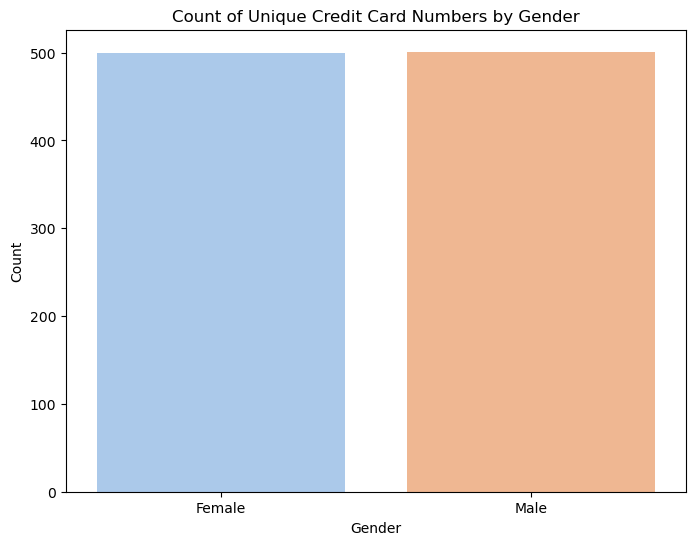

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of unique credit card numbers by gender
credit_card_counts = df_faker.groupby('gender')['credit_card_number'].nunique().reset_index(name='count')

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the count of unique credit card numbers by gender
sns.barplot(x='gender', y='count', data=credit_card_counts, palette='pastel')

# Customize the plot
plt.title('Count of Unique Credit Card Numbers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


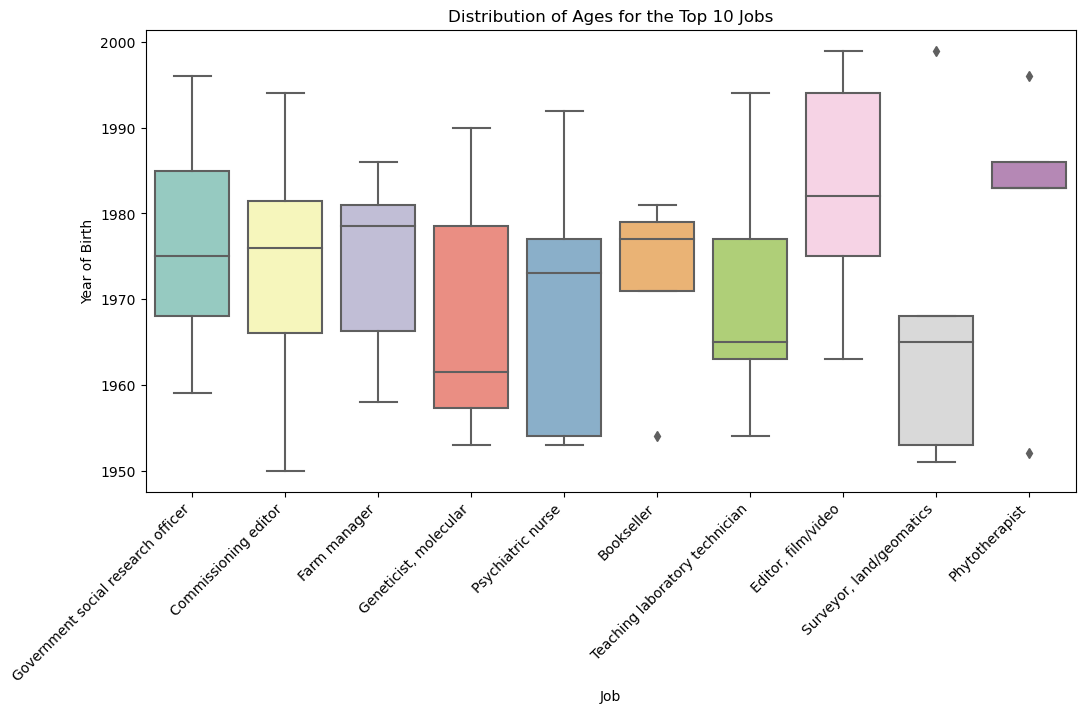

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the top 10 jobs
top_10_jobs = df_faker['job'].value_counts().nlargest(10).index
df_top_10_jobs = df_faker[df_faker['job'].isin(top_10_jobs)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot distribution of ages for the top 10 jobs
sns.boxplot(data=df_top_10_jobs, x='job', y='year', palette='Set3')

# Customize the plot
plt.title('Distribution of Ages for the Top 10 Jobs')
plt.xlabel('Job')
plt.ylabel('Year of Birth')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1200x600 with 0 Axes>

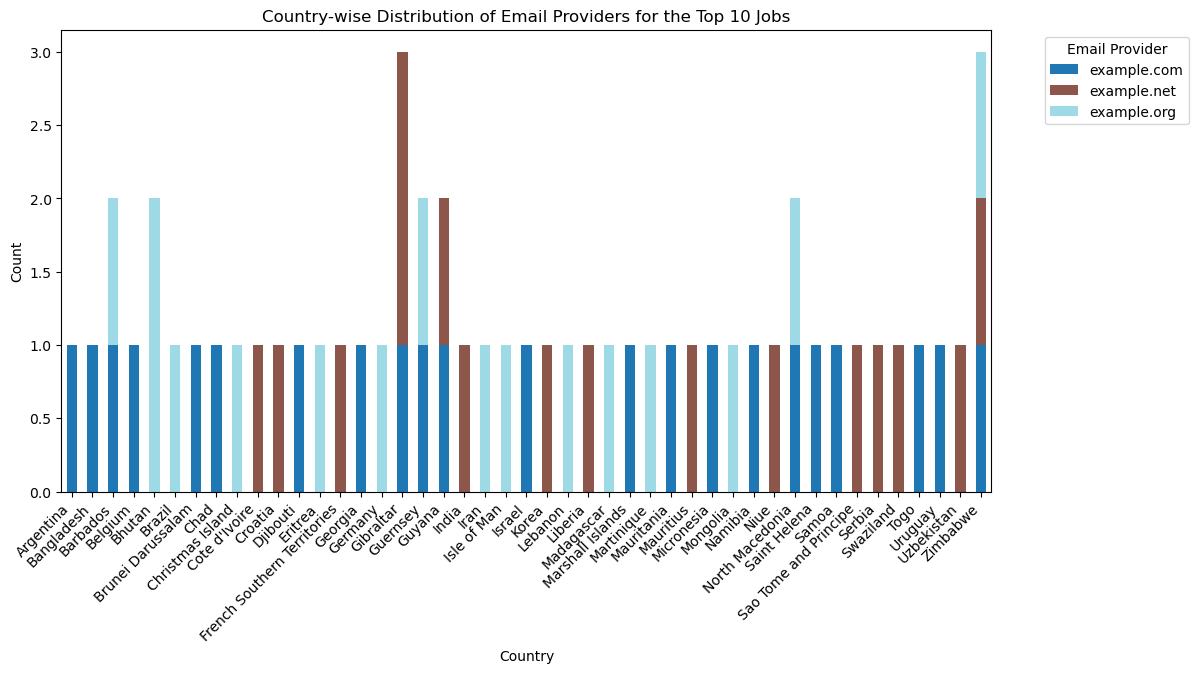

In [30]:
# Filter the DataFrame for the top 10 jobs
df_top_10_jobs = df_faker[df_faker['job'].isin(top_10_jobs)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Count the number of occurrences of each email provider in each country for the top 10 jobs
email_provider_counts_top_10 = df_top_10_jobs.groupby(['country', 'email_provider']).size().reset_index(name='count')

# Pivot the table for better visualization
pivot_email_provider_top_10 = email_provider_counts_top_10.pivot_table(index='country', columns='email_provider', values='count', fill_value=0)

# Plot a stacked bar chart of email providers by country for the top 10 jobs
pivot_email_provider_top_10.plot(kind='bar', stacked=True, cmap='tab20', figsize=(12, 6))

# Customize the plot
plt.title('Country-wise Distribution of Email Providers for the Top 10 Jobs')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Email Provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


In [38]:
df_weather

,forecastdate,location,description,temp,feels_like,temp_min,temp_max,pressure,humidity,wind,sunrise,sunset
0,2023-12-15,Morganton,"4795 Jeffrey Stravenue\nBrendamouth, NV 01919",14.62,13.37,13.82,16.52,1010,80,14.89,19:05:43,07:05:43
1,2023-12-09,Davidburgh,"71575 Matthew Knolls Suite 670\nJoneston, DC 6...",13.30,9.21,11.19,15.82,1018,47,5.25,01:56:03,13:56:03
2,2023-12-14,South Gabriel,6746 Flowers Points Suite 852\nChristopherfurt...,31.85,32.95,31.38,32.32,987,58,14.70,20:14:37,08:14:37
3,2023-12-08,Meghanton,"680 Meadows Track Apt. 972\nVasquezfort, ME 53891",11.35,16.05,10.56,12.98,1006,58,9.71,04:59:57,16:59:57
4,2023-12-13,North Kelly,"33762 Brittany Ford\nMurrayberg, TX 18332",-2.19,-5.34,-4.73,-0.08,996,57,4.61,23:39:34,11:39:34
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-12-13,Loganview,"99424 Davis Pines Apt. 699\nSouth Jorgemouth, ...",26.73,25.81,26.35,27.82,998,31,14.10,07:23:34,19:23:34
996,2023-12-07,Brookeberg,"5795 Nixon Lodge\nWest Peter, NC 78513",13.14,9.52,11.58,16.03,981,69,2.07,06:16:23,18:16:23
997,2023-12-14,Lawrenceborough,"15925 Brittany Causeway\nJosephshire, CA 18766",38.12,39.33,37.84,40.47,998,55,3.98,12:56:20,00:56:20
998,2023-12-06,West Katrina,11479 Skinner Mission Suite 712\nEast Angelast...,0.13,0.55,-0.37,0.87,994,70,1.52,03:13:18,15:13:18


In [40]:
df_weather

,forecastdate,location,description,temp,feels_like,temp_min,temp_max,pressure,humidity,wind,sunrise,sunset
0,2023-12-15,Morganton,"4795 Jeffrey Stravenue\nBrendamouth, NV 01919",14.62,13.37,13.82,16.52,1010,80,14.89,19:05:43,07:05:43
1,2023-12-09,Davidburgh,"71575 Matthew Knolls Suite 670\nJoneston, DC 6...",13.30,9.21,11.19,15.82,1018,47,5.25,01:56:03,13:56:03
2,2023-12-14,South Gabriel,6746 Flowers Points Suite 852\nChristopherfurt...,31.85,32.95,31.38,32.32,987,58,14.70,20:14:37,08:14:37
3,2023-12-08,Meghanton,"680 Meadows Track Apt. 972\nVasquezfort, ME 53891",11.35,16.05,10.56,12.98,1006,58,9.71,04:59:57,16:59:57
4,2023-12-13,North Kelly,"33762 Brittany Ford\nMurrayberg, TX 18332",-2.19,-5.34,-4.73,-0.08,996,57,4.61,23:39:34,11:39:34
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-12-13,Loganview,"99424 Davis Pines Apt. 699\nSouth Jorgemouth, ...",26.73,25.81,26.35,27.82,998,31,14.10,07:23:34,19:23:34
996,2023-12-07,Brookeberg,"5795 Nixon Lodge\nWest Peter, NC 78513",13.14,9.52,11.58,16.03,981,69,2.07,06:16:23,18:16:23
997,2023-12-14,Lawrenceborough,"15925 Brittany Causeway\nJosephshire, CA 18766",38.12,39.33,37.84,40.47,998,55,3.98,12:56:20,00:56:20
998,2023-12-06,West Katrina,11479 Skinner Mission Suite 712\nEast Angelast...,0.13,0.55,-0.37,0.87,994,70,1.52,03:13:18,15:13:18


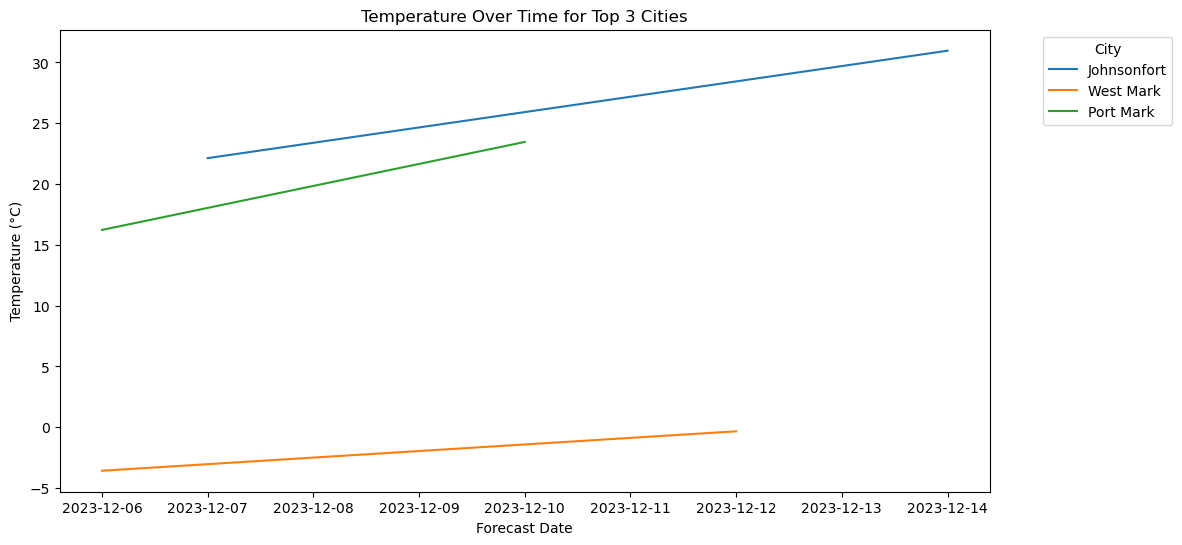

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 3 cities based on the most occurrences in the dataset
top_3_cities = df_weather['location'].value_counts().nlargest(3).index

# Filter the DataFrame for the top 3 cities
df_top_3_cities = df_weather[df_weather['location'].isin(top_3_cities)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the temperature over time for the top 3 cities
sns.lineplot(data=df_top_3_cities, x='forecastdate', y='temp', hue='location')

# Customize the plot
plt.title('Temperature Over Time for Top 3 Cities')
plt.xlabel('Forecast Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


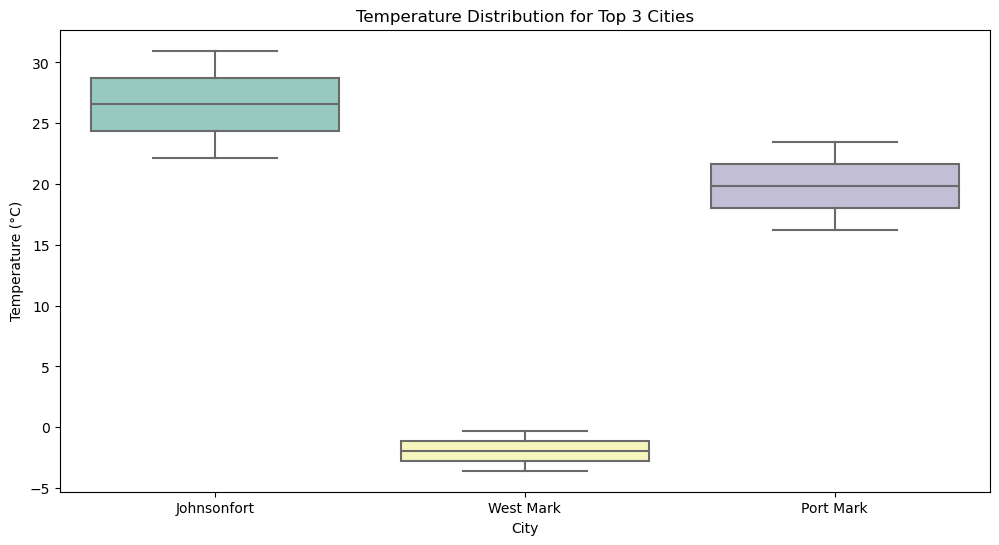

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 3 cities based on the most occurrences in the dataset
top_3_cities = df_weather['location'].value_counts().nlargest(3).index

# Filter the DataFrame for the top 3 cities
df_top_3_cities = df_weather[df_weather['location'].isin(top_3_cities)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a box plot of temperature distribution for each city
sns.boxplot(data=df_top_3_cities, x='location', y='temp', palette='Set3')

# Customize the plot
plt.title('Temperature Distribution for Top 3 Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()


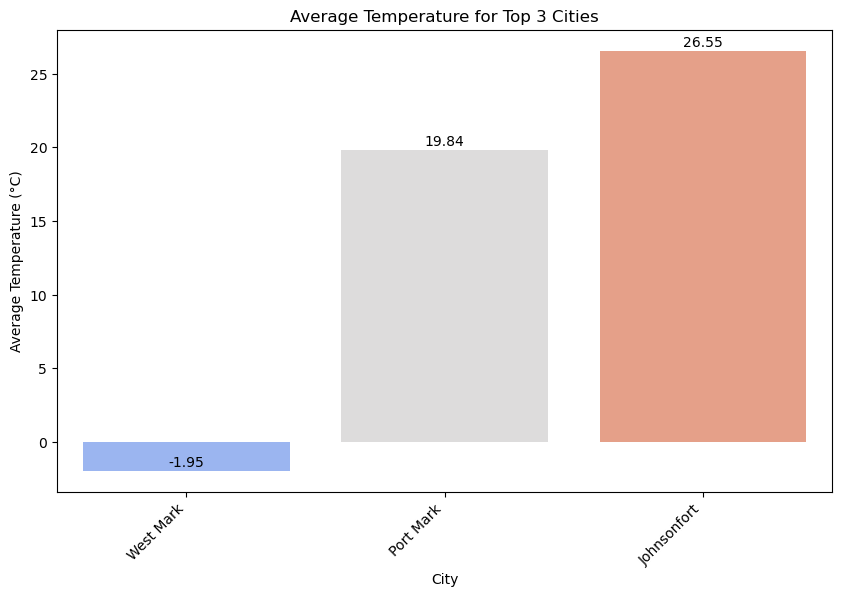

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 3 cities based on the most occurrences in the dataset
top_3_cities = df_weather['location'].value_counts().nlargest(3).index

# Filter the DataFrame for the top 3 cities
df_top_3_cities = df_weather[df_weather['location'].isin(top_3_cities)]

# Find the average temperature for each of the top 3 cities
average_temp_by_city = df_top_3_cities.groupby('location')['temp'].mean().sort_values()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of average temperatures for the top 3 cities
sns.barplot(x=average_temp_by_city.index, y=average_temp_by_city.values, palette='coolwarm')

# Display numeric values on top of each bar
for i, value in enumerate(average_temp_by_city.values):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Customize the plot
plt.title('Average Temperature for Top 3 Cities')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.show()
